In [1]:
import pandas as pd 
from sklearn import tree
fires_origin = pd.read_csv("forestfires.csv", header=0, index_col=False) 
print(fires_origin.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [2]:
temp_months = fires_origin['month'].copy()
temp_days = fires_origin['day'].copy()
print(temp_months.head(), temp_days.head())

0    mar
1    oct
2    oct
3    mar
4    mar
Name: month, dtype: object 0    fri
1    tue
2    sat
3    fri
4    sun
Name: day, dtype: object


In [3]:
switcher_months={
            'jan': 1,
            'feb': 2,
            'mar': 3,
            'apr': 4,
            'may': 5,
            'jun': 6,
            'jul': 7,
            'aug': 8,
            'sep': 9,
            'oct': 10,
            'nov': 11,
            'dec': 12,
    }

for i, val in enumerate(temp_months):
    if (type(val) == str):
        temp_months.loc[i] = switcher_months.get(val, 0)

In [4]:
switcher_days={
            'mon': 1,
            'tue': 2,
            'wed': 3,
            'thu': 4,
            'fri': 5,
            'sat': 6,
            'sun': 7,
        }
for i, val in enumerate(temp_days):
    if (type(val) == str):
        temp_days.loc[i] = switcher_days.get(val, 0)

In [5]:
print(temp_months.head(), temp_days.head())

0     3
1    10
2    10
3     3
4     3
Name: month, dtype: object 0    5
1    2
2    6
3    5
4    7
Name: day, dtype: object


In [6]:
d = {
    'X': fires_origin['X'].values, 
    'Y': fires_origin['Y'].values, 
    'month': temp_months.values, 
    'day': temp_days.values, 
    'temp': fires_origin['temp'].values,
    'RH': fires_origin['RH'].values,
    'wind': fires_origin['wind'].values,
    'rain': fires_origin['rain'].values,
    'area': fires_origin['area'].values
}
fires = pd.DataFrame(d)
print(fires.head())

   X  Y month day  temp  RH  wind  rain  area
0  7  5     3   5   8.2  51   6.7   0.0   0.0
1  7  4    10   2  18.0  33   0.9   0.0   0.0
2  7  4    10   6  14.6  33   1.3   0.0   0.0
3  8  6     3   5   8.3  97   4.0   0.2   0.0
4  8  6     3   7  11.4  99   1.8   0.0   0.0


In [7]:
import statistics as stat
maximum = max(fires['temp'])
minimum = min(fires['temp'])
median = stat.median(fires['temp'])
diff = round((maximum - median)/4)
print('TEMP MAX:', maximum)
print('TEMP MIN:', minimum)
print('TEMP MEDIAN:', median)
print('TEMP DIFF:', diff)

TEMP MAX: 33.3
TEMP MIN: 2.2
TEMP MEDIAN: 19.3
TEMP DIFF: 3


In [8]:
max_RH = max(fires['RH'])
min_RH = min(fires['RH'])
median_RH = stat.median(fires['RH'])
print('RH MAX:', max_RH)
print('RH MIN:', min_RH)
print('RH MEDIAN:', median_RH)

RH MAX: 100
RH MIN: 15
RH MEDIAN: 42


In [9]:
max_wind= max(fires['wind'])
min_wind= min(fires['wind'])
median_wind= stat.median(fires['wind'])
print('WIND MAX:', max_wind)
print('WIND MIN:', min_wind)
print('WIND MEDIAN:', median_wind)

WIND MAX: 9.4
WIND MIN: 0.4
WIND MEDIAN: 4.0


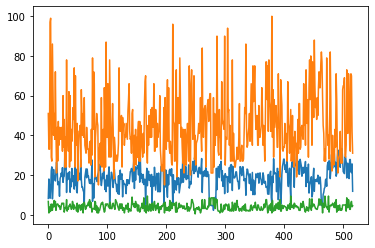

In [10]:
import matplotlib.pyplot as plt
plt.plot(fires['temp'])
plt.plot(fires['RH'])
plt.plot(fires['wind'])

In [11]:
tp = fires['temp']
rh = fires['RH']
w = fires['wind']
serious = fires['temp'].copy()
for i, val in enumerate(fires['temp']):
    #print(val, rh[i], serious[i])
    if (val >= (median + diff) and rh[i] <= 30 and w[i] >= 3.0):
        serious.loc[i] = 4
    else:
        if (val >= median + diff):
            serious.loc[i] = 3
        else: 
            if (val >= (median - diff) and rh[i] <= 50 and w[i] >= 4.0):
                serious.loc[i] = 3
            else: 
                if (val >= median - 2*diff and rh[i] <= 50 and w[i] >= 5.0):
                    serious.loc[i] = 2
                else:
                    if (val >= median - 2*diff):
                        serious.loc[i] = 1
                    else:
                        serious.loc[i] = 0
print(serious[1:20])

1     1.0
2     1.0
3     0.0
4     0.0
5     3.0
6     4.0
7     0.0
8     0.0
9     3.0
10    1.0
11    3.0
12    1.0
13    1.0
14    4.0
15    3.0
16    2.0
17    3.0
18    1.0
19    0.0
Name: temp, dtype: float64


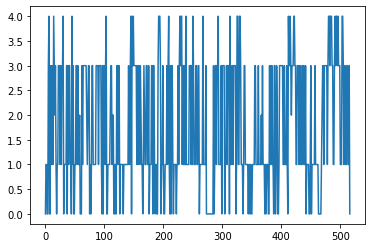

In [12]:
plt.plot(serious)

In [13]:
x = pd.DataFrame(fires.values[:,0:13], columns =['X','Y','month','day','temp', 'RH', 'wind', 'rain', 'area'])
y = pd.DataFrame(serious.values, columns =['SERIOUS'])

In [14]:
print(x.shape)
print(y.shape)

(517, 9)
(517, 1)


In [15]:
print(x[1:5])
print(y[1:5])

   X  Y month day  temp  RH wind rain area
1  7  4    10   2  18.0  33  0.9  0.0  0.0
2  7  4    10   6  14.6  33  1.3  0.0  0.0
3  8  6     3   5   8.3  97  4.0  0.2  0.0
4  8  6     3   7  11.4  99  1.8  0.0  0.0
   SERIOUS
1      1.0
2      1.0
3      0.0
4      0.0


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

In [17]:
print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())

     X  Y month day  temp  RH wind rain  area
363  4  3     9   2  15.9  53  2.2  0.0  2.93
50   4  4     9   4  20.8  17  1.3  0.0   0.0
470  5  4     4   7  17.6  27  5.8  0.0   0.0
174  1  4     8   6  14.2  53  1.8  0.0   3.5
445  5  5     8   7  17.3  80  4.5  0.0   0.0
     SERIOUS
363      1.0
50       1.0
470      3.0
174      1.0
445      1.0
     X  Y month day  temp  RH wind rain  area
304  6  5     5   6  11.3  94  4.9  0.0   0.0
501  7  5     8   2  21.6  65  4.9  0.8   0.0
441  8  6     8   1  25.5  29  1.8  0.0  1.23
153  5  4     9   5  20.1  47  4.9  0.0  1.46
503  2  4     8   3  29.2  30  4.9  0.0  1.95
     SERIOUS
304      0.0
501      1.0
441      3.0
153      3.0
503      4.0


In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(51, 9)
(51, 1)
(466, 9)
(466, 1)


In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train.values, y_train.values)

[Text(312.48, 697.62, 'temp <= 12.75\ngini = 0.679\nsamples = 51\nvalue = [8, 24, 1, 13, 5]\nclass = STRONG'),
 Text(234.36, 570.78, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0, 0]\nclass = HARD'),
 Text(390.6, 570.78, 'temp <= 22.25\ngini = 0.583\nsamples = 43\nvalue = [0, 24, 1, 13, 5]\nclass = STRONG'),
 Text(156.24, 443.94, 'wind <= 3.8\ngini = 0.362\nsamples = 31\nvalue = [0, 24, 1, 6, 0]\nclass = STRONG'),
 Text(78.12, 317.1, 'gini = 0.0\nsamples = 18\nvalue = [0, 18, 0, 0, 0]\nclass = STRONG'),
 Text(234.36, 317.1, 'RH <= 47.0\ngini = 0.568\nsamples = 13\nvalue = [0, 6, 1, 6, 0]\nclass = STRONG'),
 Text(156.24, 190.26, 'Y <= 3.0\ngini = 0.245\nsamples = 7\nvalue = [0, 0, 1, 6, 0]\nclass = SOFT'),
 Text(78.12, 63.42000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]\nclass = AVERAGE'),
 Text(234.36, 63.42000000000007, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0]\nclass = SOFT'),
 Text(312.48, 190.26, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]\nclass = ST

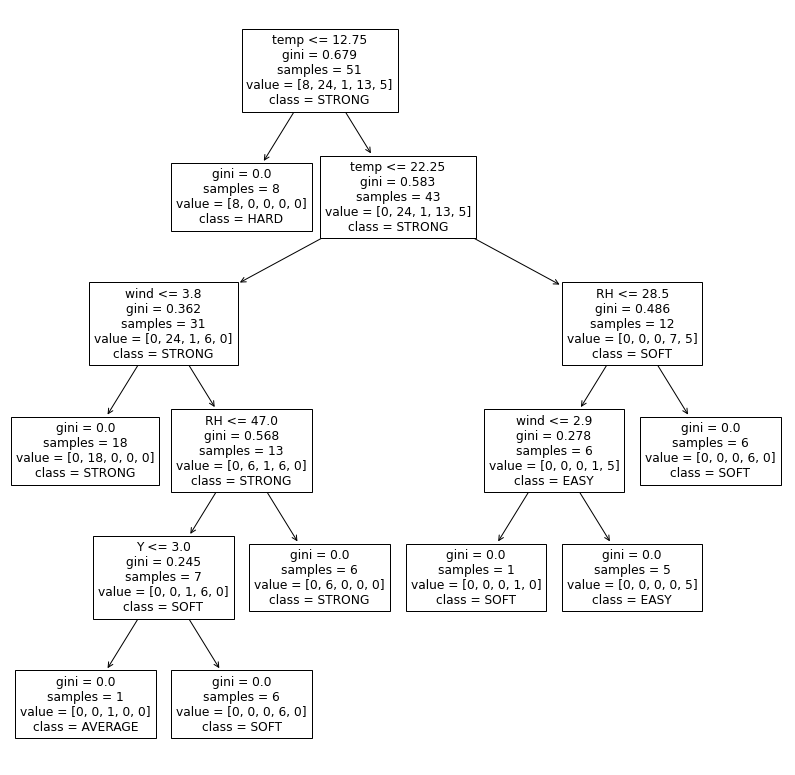

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf, feature_names=list(x.columns), class_names=['HARD', 'STRONG', 'AVERAGE', 'SOFT', 'EASY'])

In [21]:
serious[int(clf.predict([[6, 4, 9, 8, 22.0, 45, 5.0, 1.0, 2.00]]))]

0.0

[Text(390.6, 570.78, 'temp <= 12.75\ngini = 0.679\nsamples = 51\nvalue = [8, 24, 1, 13, 5]\nclass = STRONG'),
 Text(195.3, 190.26, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0, 0]\nclass = HARD'),
 Text(585.9000000000001, 190.26, 'gini = 0.583\nsamples = 43\nvalue = [0, 24, 1, 13, 5]\nclass = STRONG')]

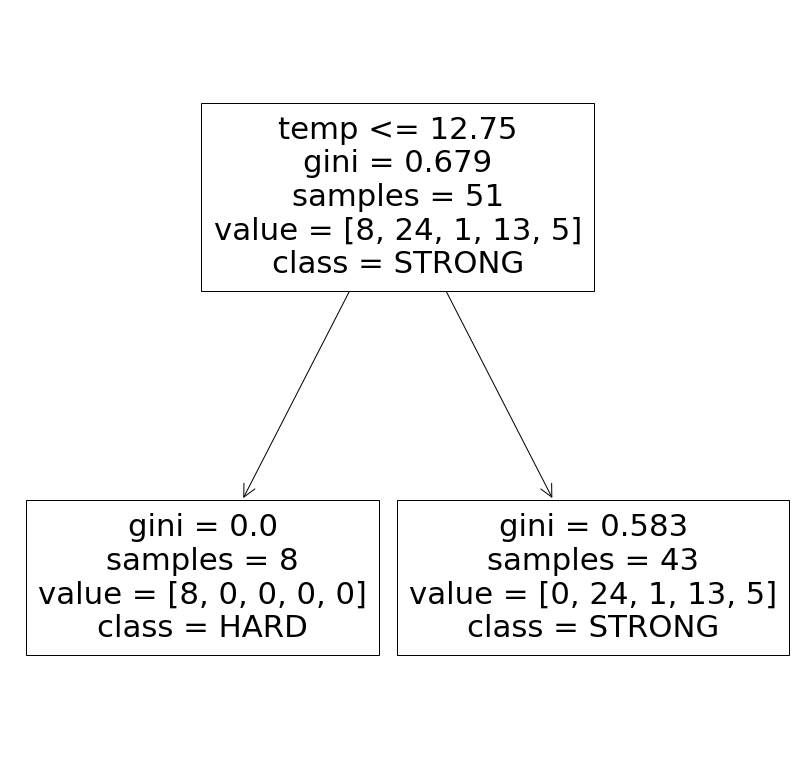

In [111]:
clf_max_depth_equal_to_1 = tree.DecisionTreeClassifier(max_depth=1)
clf_max_depth_equal_to_1 = clf_max_depth_equal_to_1.fit(x_train.values, y_train.values)
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf_max_depth_equal_to_1, feature_names=list(x.columns),  
               class_names=['HARD', 'STRONG', 'AVERAGE', 'SOFT', 'EASY'])

[Text(312.48, 634.1999999999999, 'temp <= 12.75\ngini = 0.679\nsamples = 51\nvalue = [8, 24, 1, 13, 5]\nclass = STRONG'),
 Text(156.24, 380.52, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0, 0]\nclass = HARD'),
 Text(468.72, 380.52, 'temp <= 22.25\ngini = 0.583\nsamples = 43\nvalue = [0, 24, 1, 13, 5]\nclass = STRONG'),
 Text(312.48, 126.84000000000003, 'gini = 0.362\nsamples = 31\nvalue = [0, 24, 1, 6, 0]\nclass = STRONG'),
 Text(624.96, 126.84000000000003, 'gini = 0.486\nsamples = 12\nvalue = [0, 0, 0, 7, 5]\nclass = SOFT')]

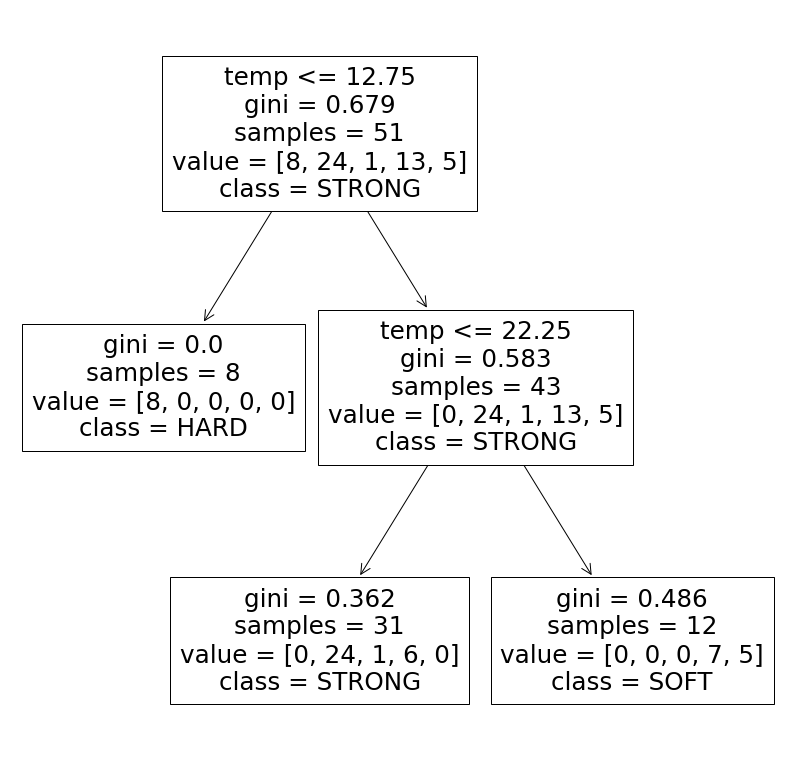

In [112]:
clf_max_depth_equal_to_2 = tree.DecisionTreeClassifier(max_depth=2)
clf_max_depth_equal_to_2 = clf_max_depth_equal_to_2.fit(x_train.values, y_train.values)
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf_max_depth_equal_to_2, feature_names=list(x.columns),  
               class_names=['HARD', 'STRONG', 'AVERAGE', 'SOFT', 'EASY'])

[Text(292.95000000000005, 665.91, 'temp <= 12.75\ngini = 0.679\nsamples = 51\nvalue = [8, 24, 1, 13, 5]\nclass = STRONG'),
 Text(195.3, 475.65, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0, 0]\nclass = HARD'),
 Text(390.6, 475.65, 'temp <= 22.25\ngini = 0.583\nsamples = 43\nvalue = [0, 24, 1, 13, 5]\nclass = STRONG'),
 Text(195.3, 285.39, 'wind <= 3.8\ngini = 0.362\nsamples = 31\nvalue = [0, 24, 1, 6, 0]\nclass = STRONG'),
 Text(97.65, 95.13, 'gini = 0.0\nsamples = 18\nvalue = [0, 18, 0, 0, 0]\nclass = STRONG'),
 Text(292.95000000000005, 95.13, 'gini = 0.568\nsamples = 13\nvalue = [0, 6, 1, 6, 0]\nclass = STRONG'),
 Text(585.9000000000001, 285.39, 'RH <= 28.5\ngini = 0.486\nsamples = 12\nvalue = [0, 0, 0, 7, 5]\nclass = SOFT'),
 Text(488.25, 95.13, 'gini = 0.278\nsamples = 6\nvalue = [0, 0, 0, 1, 5]\nclass = EASY'),
 Text(683.5500000000001, 95.13, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0]\nclass = SOFT')]

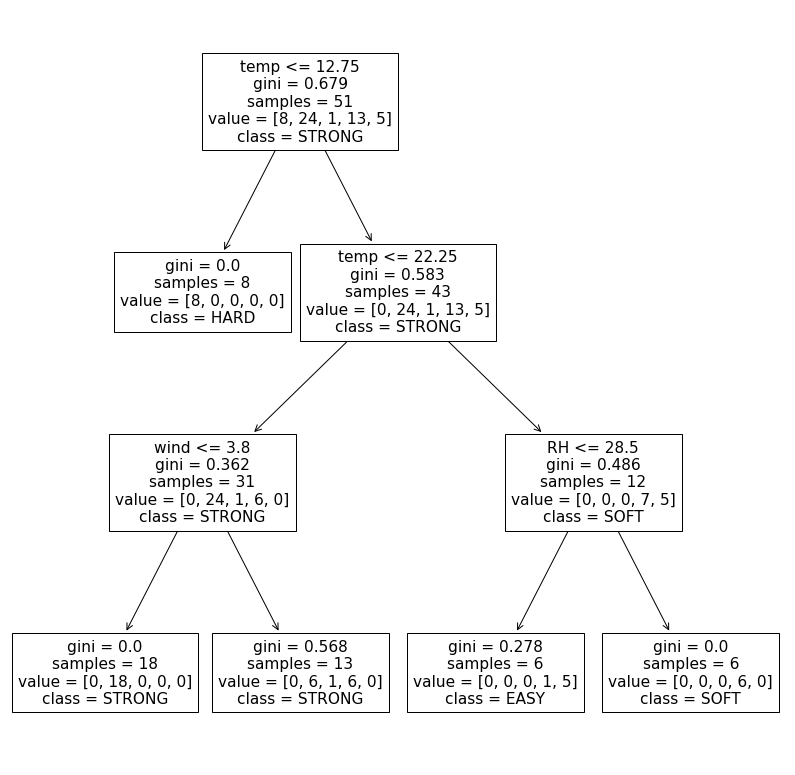

In [113]:
clf_max_depth_equal_to_3 = tree.DecisionTreeClassifier(max_depth=3)
clf_max_depth_equal_to_3 = clf_max_depth_equal_to_3.fit(x_train.values, y_train.values)
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf_max_depth_equal_to_3, feature_names=list(x.columns),  
               class_names=['HARD', 'STRONG', 'AVERAGE', 'SOFT', 'EASY'])

[Text(312.48, 684.9359999999999, 'temp <= 12.75\ngini = 0.679\nsamples = 51\nvalue = [8, 24, 1, 13, 5]\nclass = STRONG'),
 Text(234.36, 532.728, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0, 0]\nclass = HARD'),
 Text(390.6, 532.728, 'temp <= 22.25\ngini = 0.583\nsamples = 43\nvalue = [0, 24, 1, 13, 5]\nclass = STRONG'),
 Text(156.24, 380.52, 'wind <= 3.8\ngini = 0.362\nsamples = 31\nvalue = [0, 24, 1, 6, 0]\nclass = STRONG'),
 Text(78.12, 228.312, 'gini = 0.0\nsamples = 18\nvalue = [0, 18, 0, 0, 0]\nclass = STRONG'),
 Text(234.36, 228.312, 'RH <= 47.0\ngini = 0.568\nsamples = 13\nvalue = [0, 6, 1, 6, 0]\nclass = STRONG'),
 Text(156.24, 76.10399999999993, 'gini = 0.245\nsamples = 7\nvalue = [0, 0, 1, 6, 0]\nclass = SOFT'),
 Text(312.48, 76.10399999999993, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]\nclass = STRONG'),
 Text(624.96, 380.52, 'RH <= 28.5\ngini = 0.486\nsamples = 12\nvalue = [0, 0, 0, 7, 5]\nclass = SOFT'),
 Text(546.84, 228.312, 'X <= 2.5\ngini = 0.278\nsamples = 6\n

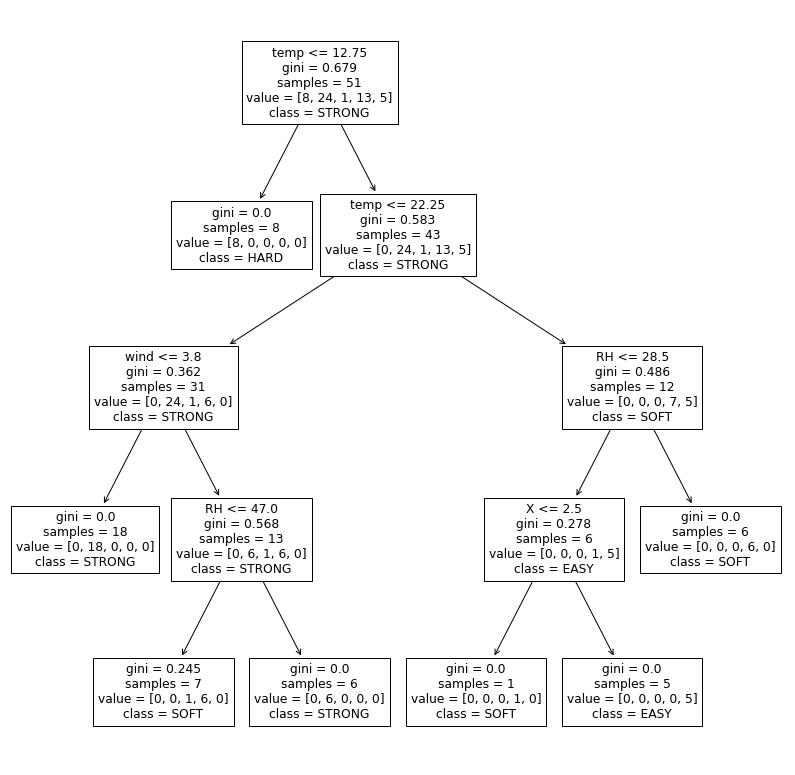

In [114]:
clf_max_depth_equal_to_4 = tree.DecisionTreeClassifier(max_depth=4)
clf_max_depth_equal_to_4 = clf_max_depth_equal_to_4.fit(x_train.values, y_train.values)
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf_max_depth_equal_to_4, feature_names=list(x.columns),  
               class_names=['HARD', 'STRONG', 'AVERAGE', 'SOFT', 'EASY'])

In [115]:
y_test_pred_from_clf = clf.predict(x_test.values)
y_test_pred_from_clf_max_depth_equal_to_1 = clf_max_depth_equal_to_1.predict(x_test.values)
y_test_pred_from_clf_max_depth_equal_to_2 = clf_max_depth_equal_to_2.predict(x_test.values)
y_test_pred_from_clf_max_depth_equal_to_3 = clf_max_depth_equal_to_3.predict(x_test.values)
y_test_pred_from_clf_max_depth_equal_to_4 = clf_max_depth_equal_to_4.predict(x_test.values)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred_from_clf))
print(accuracy_score(y_test, y_test_pred_from_clf_max_depth_equal_to_1))
print(accuracy_score(y_test, y_test_pred_from_clf_max_depth_equal_to_2))
print(accuracy_score(y_test, y_test_pred_from_clf_max_depth_equal_to_3))
print(accuracy_score(y_test, y_test_pred_from_clf_max_depth_equal_to_4))

0.9098712446351931
0.5450643776824035
0.7489270386266095
0.778969957081545
0.9012875536480687
